# Problem 1

In [1]:
# import the libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy import signal
import sounddevice as sd
import soundfile as sf
from IPython.display import Image
from pathlib import Path

In [2]:
def create_sin_wavs(A,fs,f,duration,phase):

    '''
    A function to create sin wave
    A --- amplitude
    fs --- sampling rate
    f --- frequency of the signal
    duration --- duration of the signal (s)
    phase --- phase of the signal
    '''
    num_of_samples = fs * duration
    t = np.linspace(0, duration, num=num_of_samples,endpoint=False)
    x = A * np.sin(2 * np.pi * f * t + phase)

    return x

def plot_sin (x):
    plt.figure()
    t = np.linspace(0,len(x) / fs,len(x), endpoint=False)
    plt.plot(t,x)
    plt.axis('tight')
    plt.grid('on')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')


Sampling frequency, fs,  of a signal tells you how many samples are there in one sec, therefore if the duration is 3 sec, no. of samples would be 3*fs.

In [3]:
fs = 8000     # sample rate
duration = 3  # 3 sec
num_of_samples = fs * duration

#### 1 a) create sinusoids with chosen amplitudes and phases
x0 = create_sin_wavs(5, fs, 100, duration, np.pi/4)
print(x0.shape)
x1 = create_sin_wavs(7, fs, 500, duration, np.pi/2)
x2 = create_sin_wavs(9, fs, 1500, duration, 3*np.pi/4)
x3 = create_sin_wavs(10, fs, 2500, duration, np.pi)

#### play sinusoids

#sd.play(x0,fs)

'''
sd.play(x1,fs)
sd.play(x2,fs)
sd.play(x3,fs) '''


(24000,)


'\nsd.play(x1,fs)\nsd.play(x2,fs)\nsd.play(x3,fs) '

Text(0.5, 1.0, 'Sin wav of fre 2500 Hz')

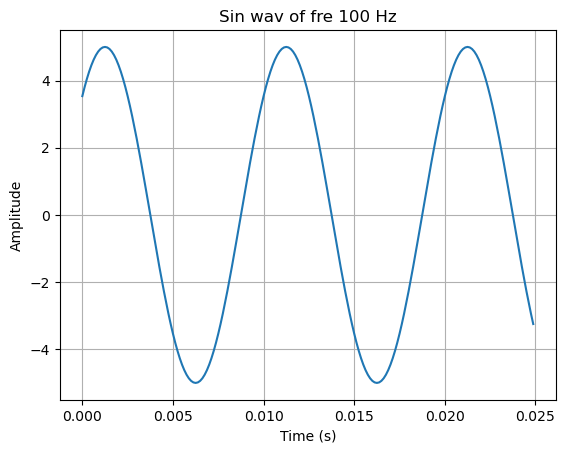

<Figure size 640x480 with 0 Axes>

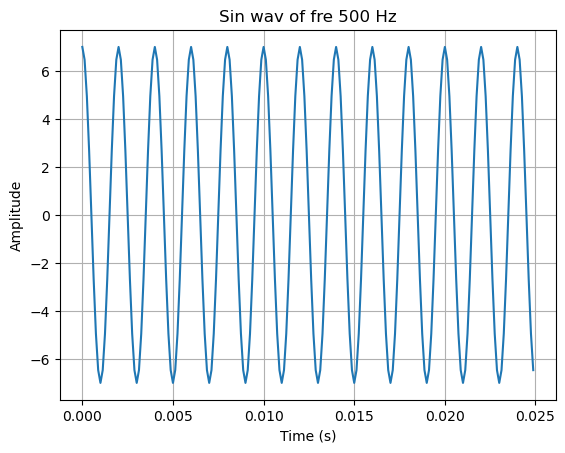

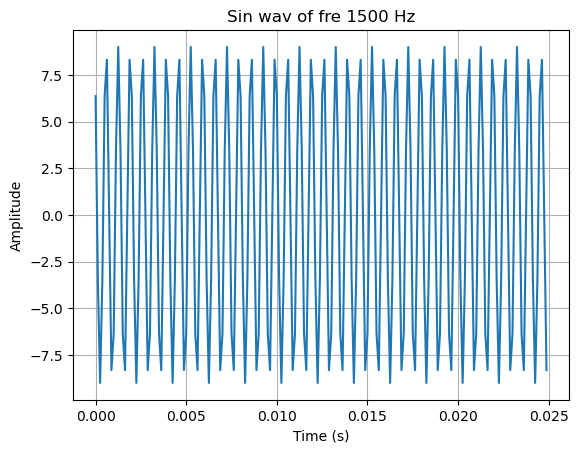

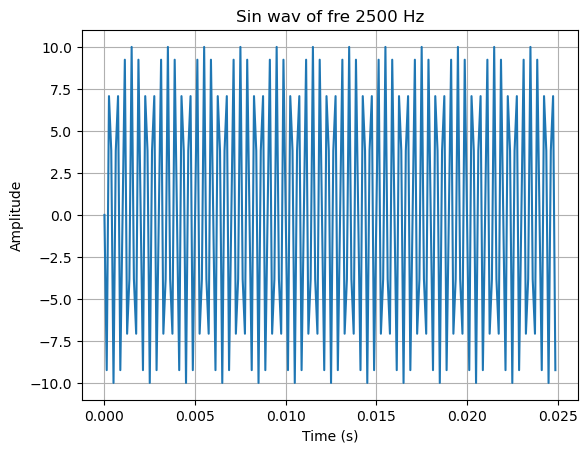

In [4]:

#### Plot sinusoids (only first 200 samples are displayed for better visualization)

plot_sin (x0[:200])
plt.title('Sin wav of fre 100 Hz')
plt.figure()
plot_sin (x1[:200])
plt.title('Sin wav of fre 500 Hz')
plot_sin (x2[:200])
plt.title('Sin wav of fre 1500 Hz')
plot_sin (x3[:200])
plt.title('Sin wav of fre 2500 Hz')

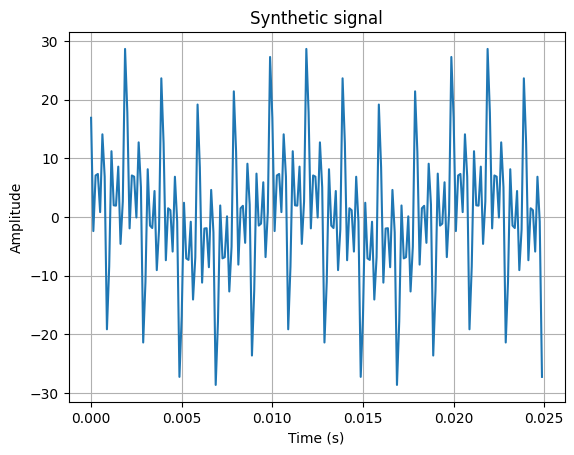

In [131]:
# 1 c) Add them up to x(t). Plot and play x(t). Write the signal to a wav file.

x = x0 + x1 + x2 + x3
plot_sin(x[:200])
plt.title('Synthetic signal')
#sf.write('synthetic_sig.wav',x,8000)
from scipy.io.wavfile import write
write('synthetic_sig.wav',8000,x)

44100
145530


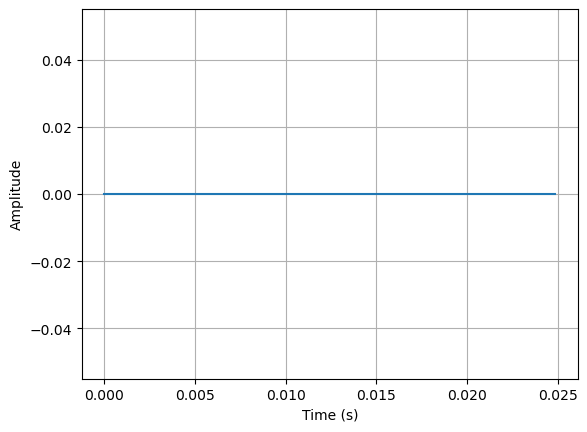

In [8]:
# read audio
from scipy.io.wavfile import read
sr,s = read('audio1.wav')
print(sr)
plot_sin(s[:200])
print(len(s))

In [133]:
# Play audio
#sd.play(s,sr)
#audio_file = Path().cwd() / 'synthetic_sig.wav'
#sd.play(s, sr)
#play(data)

In [7]:
# 1d) Apply DFT with nfft= 512

K = 512
fre = np.arange(K) * (fs/K)
spectrum = fft(x,K)
plt.figure(1)
plt.grid('on')
plt.plot(fre[:len(fre)//2+1],2*abs(spectrum)[:len(fre)//2+1]/K)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude ')
plt.title('Fig 1: Spectrum of the synthetic signal')


NameError: name 'x' is not defined

[ 89.28640357  98.1146742  141.08938324 620.90778695 146.52568762
  51.63943066  26.21095404  15.11415736  10.05324434   9.17806155]


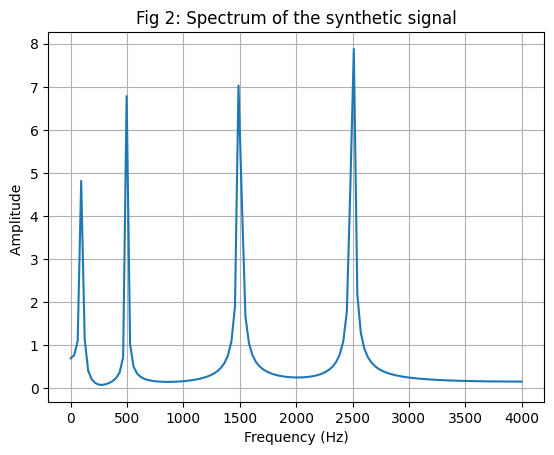

In [135]:
# 1d) Let us try applying DFT with nfft = 258

K = 258
fre = np.arange(K) * (fs/K)
spectrum = fft(x,K)
plt.figure(2)
plt.grid('on')
plt.plot(fre[:len(fre)//2+1],2*abs(spectrum)[:len(fre)//2+1]/K)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude ')
plt.title('Fig 2: Spectrum of the synthetic signal')
print(np.abs(spectrum[:10]))


(array([0]),)


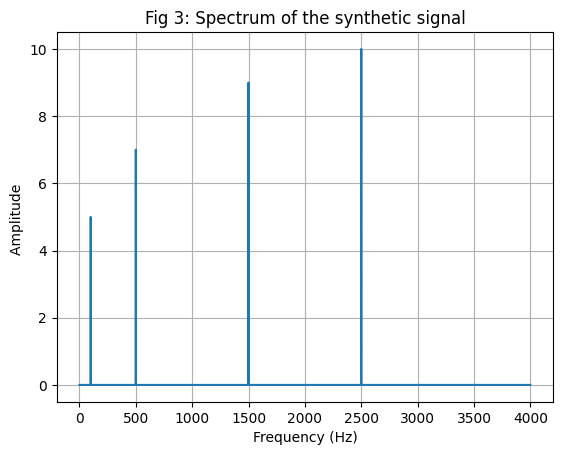

In [136]:
# 1d) And now  with nfft = signal length

K = fs*3
fre = np.arange(K) * (fs/K)
spectrum = fft(x,K)
plt.figure(3)
plt.grid('on')
plt.plot(fre[:len(fre)//2+1],2*abs(spectrum)[:len(fre)//2+1]/K)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude ')
plt.title('Fig 3: Spectrum of the synthetic signal')
print(np.where(np.any(np.abs(spectrum) >1e-15)))


 1 e)

**Takeaway 1**: First of all you need only (nfft/2+1) DFT points to represent the spectrum for these signals (as nfft is even). Here (nfft/2+1) points cover a range from 0 to 4KHz (fs/2) hence choice of number of DFT points decides the frequency resolution for your spectrum. Here the frequency resolution is fs/K.

A nice visualization of symmetry property of DFT:
![here](DFT_symmetry.png)

[source](https://blogs.uoregon.edu/seis/wiki/unpacking-the-matlab-fft/)

**Takeaway 2**: Computing DFT with a finite length signal is akin to multiplication with a rectangular window. As DFT assumes periodicity, it will lead to other  frequency components appearing in your spectrum, i.e., spectral leakage as observed in all plots except Fig 3. If the frequency components in the signal are an integer multiple of frequency resolution, you'll have sharp peaks in the spectrum, e.g., 80, 160, 8000, etc. Even though spectral leakage is present, it is not visible (Fig. 3). [Spectral leakage](https://blogs.mathworks.com/steve/2014/09/23/sinusoids-and-fft-frequency-bins/) <br> <br>
The multiplication by 2 is to compensate  for energy since we have discarded the second half of the signal. Moreover, we divide it by the length of the window to scale it properly to compare the frequency spectrums computed with different FFT lengths.

# Problem 2

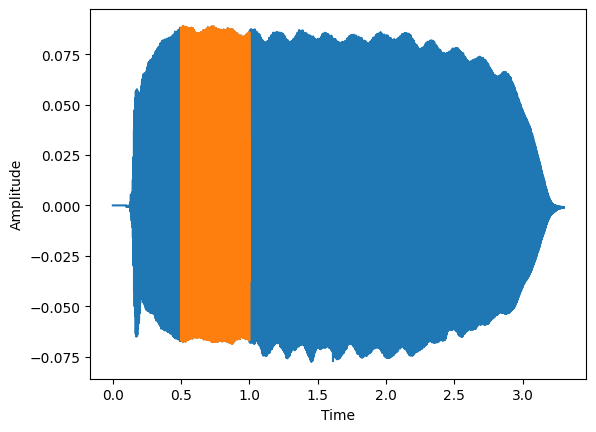

In [137]:
# 2 a,b) Read audio1, play it and plot it

audio, fs = sf.read('audio1.wav')
#sd.play(audio,fs)
time_axis = np.linspace(0, len(audio)/fs, len(audio), endpoint=False)
plt.plot(time_axis, audio)
plt.ylabel("Amplitude")
plt.xlabel("Time")


plt.plot(time_axis[int(0.5*fs): fs], audio[int(0.5*fs): fs]) # portion of audio1 between 0.5 to 1 sec

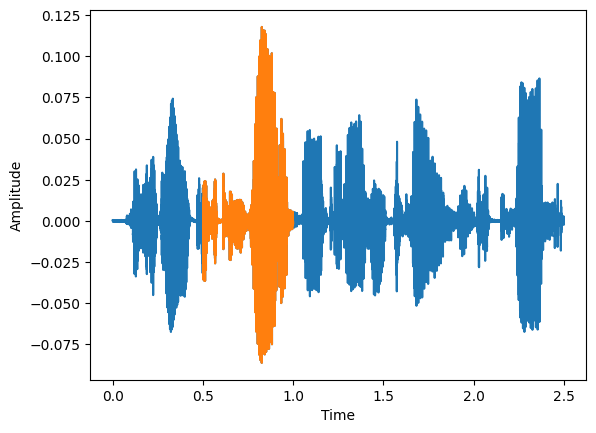

In [138]:
# 2 a,b) Read audio2, play it and plot it

audio, fs = sf.read('audio2.wav')
#sd.play(audio,fs)
time_axis = np.linspace(0, len(audio)/fs, len(audio), endpoint=False)
plt.plot(time_axis, audio)
plt.ylabel("Amplitude")
plt.xlabel("Time")

plt.plot(time_axis[int(0.5*fs): fs], audio[int(0.5*fs): fs]) # portion of audio1 between 0.5 to 1 sec

sampling rate for audio1 is : 44100
DFT array has the shape (23, 4410)
Frame length:  4410.0
Audio length:  (101430,)


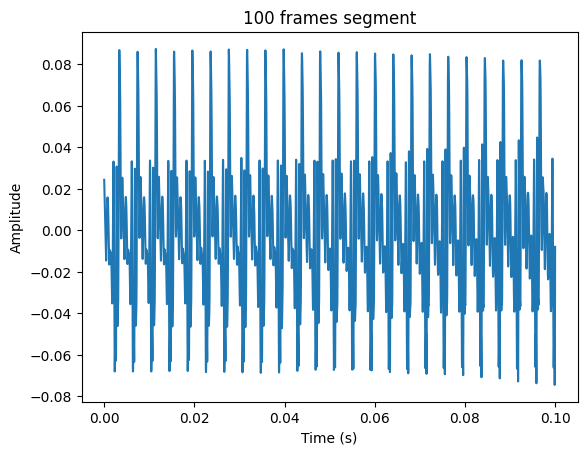

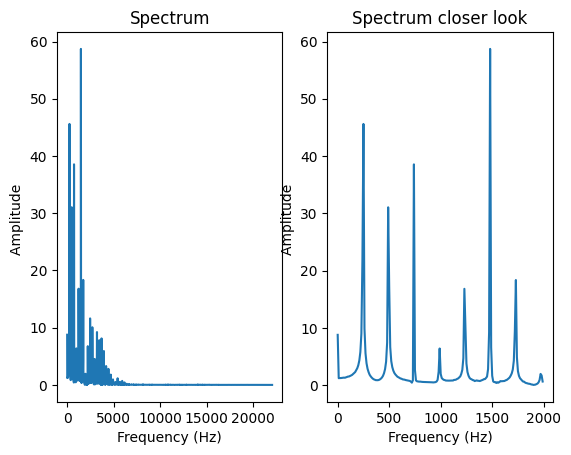

In [139]:
# 2 c,d) Compute DFT in a loop for audio 1

audio, fs = sf.read('audio1.wav')
print('sampling rate for audio1 is :', fs)

frame_length = 0.1*fs # time_duration * fs
audio = audio[int(1*fs) :] # signal from 1 sec to the end
nfft = int(frame_length)   # choose number of DFT points

# Loop for DFT computation
DFT = []
for i in np.arange(0,len(audio)//frame_length):

    s = audio[int(i*frame_length): int((i+1)*frame_length)]
    spectrum = fft(s, nfft)
    DFT.append(spectrum)

    if i == 0:           # plot first audio frame
        plt.figure()
        t = np.linspace(0,len(s)/fs,len(s))
        plt.plot(t, s)
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.title('100 frames segment')

        plt.figure()
        plt.subplot(1, 2, 1)
        fre = np.arange(nfft) * (fs/nfft)     # dividing the number of points by freq resolution (fs/nfft)
        plt.plot(fre[:len(fre)//2+1], abs(spectrum)[:len(fre)//2+1])
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Amplitude ')
        plt.title('Spectrum')

        # Zoom in first 200 points
        plt.subplot(1, 2, 2)
        plt.plot(fre[:200], abs(spectrum)[:200])
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Amplitude ')
        plt.title('Spectrum closer look')

# DFT array
DFT =  np.array(DFT)
print('DFT array has the shape', DFT.shape)
print('Frame length: ', frame_length)
print('Audio length: ', audio.shape)

22050
DFT array has the shape (15, 2205)


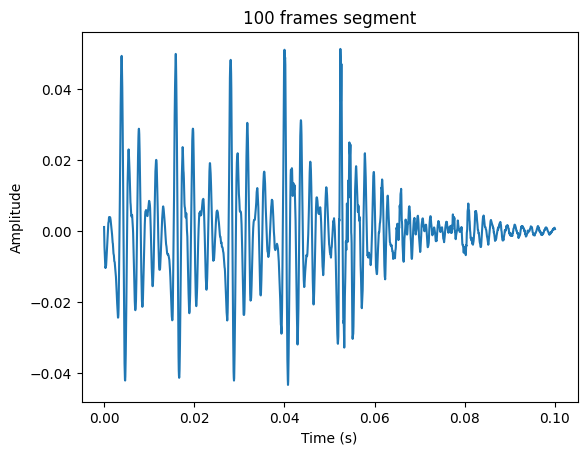

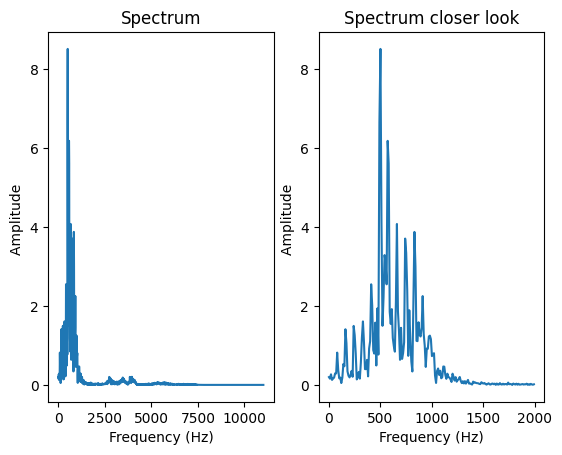

In [140]:
# 2 c,d) Compute DFT in a loop for audio 2

audio, fs = sf.read('audio2.wav')
print(fs)
frame_length = 0.1*fs # time_duration * fs
audio = audio[int(1*fs) :] # signal from 1 sec to the end
nfft = int(frame_length)   # choose number of DFT points

# Loop for DFT computation
DFT = []
for i in np.arange(0,len(audio)//frame_length):

    s = audio[int(i*frame_length): int((i+1)*frame_length)]
    spectrum = fft(s, nfft)
    DFT.append(spectrum)

    if i == 1:   # plot second frame
        plt.figure()
        t = np.linspace(0,len(s)/fs,len(s))
        plt.plot(t, s)
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.title('100 frames segment')

        plt.figure()
        plt.subplot(1, 2, 1)
        fre = np.arange(nfft) * (fs/nfft)  # dividing the number of points by freq resolution (fs/nfft)
        plt.plot(fre[:len(fre)//2+1], abs(spectrum)[:len(fre)//2+1])
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Amplitude ')
        plt.title('Spectrum')

         # Zoom in first 200 points
        plt.subplot(1, 2, 2)
        plt.plot(fre[:200], abs(spectrum)[:200])
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Amplitude ')
        plt.title('Spectrum closer look')

# DFT array
DFT =  np.array(DFT)
print('DFT array has the shape', DFT.shape)


 2 e)

Takeaway : It can be seen that sum of sinusoid is a very simple signal in terms of its frequency content. 'audio1.wav' being  a simple musical signal shows somewhat of a similar structure with fundamental and harmonics. A speech signal 'audio2.wav' has more varying frequency content.

# Bonus problem

Text(0.5, 1.0, 'Spectrum')

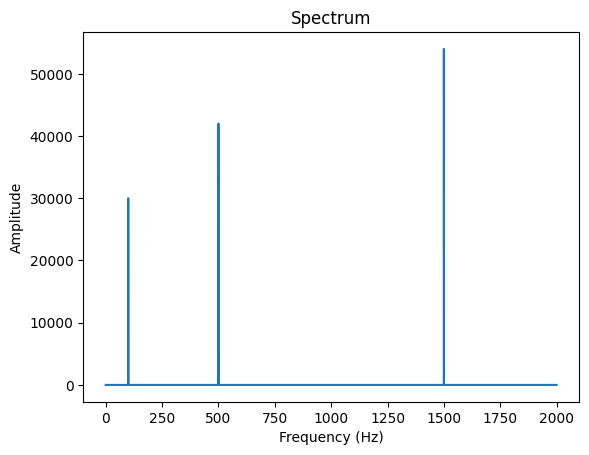

In [141]:
num = len(x)//2     # number of samples in downsamples signal

x_resampled=signal.resample(x, num) # resample the signal
nfft = len(x_resampled)            # choose nfft

fs =  8000//2                      # new sampling rate
sf.write('resampled.wav',x_resampled,fs) # write audio

spec = fft(x_resampled, nfft)       # compute DFT

# plot
plt.figure()
fre = np.arange(nfft) * (fs/nfft)
plt.plot(fre[:len(fre)//2+1],abs(spec)[:len(fre)//2+1])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectrum')

In Bonus problem, the reason there are only three peaks is that due to Nyquist criterion all frequency components above 2KHz (fs/2) will be not be reproduced and rather aliased. Otherwise the rest of the components will show up as before.